# 📌ACTIVIDAD 2: UN CASO MÁS REAL.

Crea el fichero u02_p03_a2_reglin_<tus_iniciales>.py. Vamos a trabajar con los datos del fichero
"seguros_de_coches.csv" que utiliza una compañía aseguradora. <br><br>
COMPRENDER LOS DATOS DEL DATASET<br><br>
Hay 3 tipos de características:<br><br>
(a) La especificación de un automóvil en términos de diferentes características.<br><br>
(b) Su calificación de riesgo de seguro asignada. Es un indicador del grado en que el
automóvil es más problemático de lo que indica su precio. Inicialmente, a los automóviles se
les asigna un símbolo de factor de riesgo asociado con su precio. Luego, si es más arriesgado (o
menos), este símbolo se ajusta moviéndolo hacia arriba (o hacia abajo) en la escala. Los
profesionales llaman a este proceso “symboling”. Un valor de 3 indica que el automóvil es
riesgoso y -3 que probablemente sea bastante seguro.<br><br>
(c) El pago medio relativo por pérdida por año de vehículo asegurado. Este valor está
normalizado para todos los automóviles dentro de una clasificación de tamaño particular (twodoor small, station wagons, sports/speciality, etc…) y representa la pérdida promedio por
automóvil por año.<br><br>
Hay que tener en cuenta que los valores ausentes están definidos con un “?”. Completa los siguientes
pasos en el fichero Python comenzando por:<br><br>
a) Cargar los datos en un Dataframe, (adapta la ruta al código de la siguiente figura). <br><br>
b) Mostrar los 5 primeros ejemplos por pantalla (completa y obtén mismos resultados).<br><br>
c) Muestra un resumen de las columnas del dataset (completa y obtén mismos resultados). <br><br>


In [87]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columnas = ['symboling', 'perdidas_normal', 'marca', 'combustible', 'inyección',
            'puertas', 'chasis', 'tracción', 'lugar_de_motor', 'potencia_base',
            'longitud', 'anchura', 'altura', 'peso', 'tipo_motor',
            'cilindros', 'tamaño_motor', 'sistema', 'calibre', 'ataque',
            'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad',
            'precio']

autos = pd.read_csv("recursos/U02_P03/seguros_de_coches.csv", header=None, names=columnas, na_values='?', delimiter=",")

DATOS AUSENTES Y CATEGÓRICOS<br><br>
Los datos se han cargado remplazando los símbolos “?” como valores ausentes NaN. como estaba
definido en la información del dataset. Primero sumarizamos los datos ausentes por característica.
Luego nos podemos fijar en el listado que nos ha devuelto el método autos.info() y todas las que no
tengan un tipo numérico (intX y floatX) serán categóricas de una u otra forma

In [88]:
# Valores ausentes y columnas categóricas
print("========== Valores ausentes:\n", autos.isna().sum())

cols_categoricas = ["marca", "sistema", "combustible", "inyección", "chasis", "tracción", "lugar_de_motor", "tipo_motor"]

autos[cols_categoricas] = autos[cols_categoricas].astype("category")

autos["puertas"] = pd.Categorical(autos["puertas"], categories=["two", "four"], ordered=True)

autos["cilindros"] = pd.Categorical(autos["cilindros"],
                                    categories=["two", "three", "four", "five", "six", "eight", "twelve"],
                                    ordered=True)

print("========== Cambiamos a tipo category:\n", autos.info())

========== Valores ausentes:
 symboling             0
perdidas_normal      37
marca                 0
combustible           0
inyección             0
puertas               2
chasis                0
tracción              0
lugar_de_motor        0
potencia_base         0
longitud              0
anchura               0
altura                0
peso                  0
tipo_motor            0
cilindros             0
tamaño_motor          0
sistema               0
calibre               4
ataque                4
ratio_compresion      0
potencia_cv           2
max_rpm               2
consumo_carretera     0
consumo_ciudad        0
precio                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   perdidas_normal    164 non-null    float64 
 2   marca              201 non-

Para corregirlas podemos crearnos un array con sus nombres.
Completa el array cols_categoricas de la figura con el resto de
características categóricas (ahora solamente aparecen la primera y
la última). Usamos este array para cambiarles el tipo de dato. Y a
dos características ordinales le indicamos que lo son. Por último
mostramos información del dataframe. Deberías obtener algo
similar a esto como salida.<br><br>
Descripción estadística<br><br>
Se debe hacer un análisis de cada una de las variables y describir
sus propiedades. Realizar el análisis univariado es muy
importante para entender el comportamiento de cada una de las
variables y poder detectar posibles problemas en los datos. Nunca
hay que saltarse este paso. Por ejemplo vas a contar cuantas veces
aparece cada valor de las columnas categóricas. Aquellas
columnas que tengan valores que solamente aparezcan una vez,
las añades al array cols_categoricas_escasas.

In [89]:
cols_categoricas_escasas = ["lugar_de_motor", "tipo_motor", "sistema"]

for col in cols_categoricas:
    print(autos[col].value_counts())
    print("")

marca
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romeo        3
jaguar            3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

sistema
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

combustible
gas       181
diesel     20
Name: count, dtype: int64

inyección
std      165
turbo     36
Name: count, dtype: int64

chasis
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

tracción
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

lugar_de_motor
front    198
rear       3
Name: count, dtype: int64

tipo_motor
oh

Algunos valores categóricos solo aparecen en un único ejemplo, es el caso de la característica “marca”
donde “mercury” solamente aparece una vez y eso puede dar problemas a los encoders. Igual ocurre
con otras características. Una solución es ocuparse de estos casos en la fase de ingeniería de
características (es lo que haremos en este ejemplo). Pero se puede perder conocimiento.
Otra solución es añadir más datos (posibilidad que no tenemos) o encargarse de garantizar que
siempre estén estos ejemplos en el conjunto de entrenamiento. Este procedimiento necesita una
implementación más compleja. Podemos crearnos un dataset temporal y añadirlo a los datos de train
los ejemplos con valores escasos de manera artificial. Para ello creamos una condición para cada
característica que tenga estos valores escasos y podemos generar sus datos. Completa las dos
condiciones que faltan del siguiente código:

In [90]:
cond_1 = "sistema in ['mfi', 'spfi']"
cond_2 = "cilindros in [2,3]"
cond_3 = "cilindros in [4,5]"
unir_a_train = autos.query(f"{cond_1} | {cond_2} | {cond_3}")
print("Datos qe no sabemos perder:", unir_a_train)

Datos qe no sabemos perder:     symboling  perdidas_normal  marca combustible inyección puertas  \
28          3            145.0  dodge         gas     turbo     two   
43          2              NaN  isuzu         gas       std     two   

       chasis tracción lugar_de_motor  potencia_base  ...  tamaño_motor  \
28  hatchback      fwd          front           95.9  ...           156   
43  hatchback      rwd          front           96.0  ...           119   

    sistema  calibre  ataque ratio_compresion potencia_cv  max_rpm  \
28      mfi     3.60    3.90              7.0       145.0   5000.0   
43     spfi     3.43    3.23              9.2        90.0   5000.0   

   consumo_carretera  consumo_ciudad  precio  
28                19              24   12964  
43                24              29   11048  

[2 rows x 26 columns]


ESTUDIAR ESTADÍSTICAS DE PAREJAS DE VARIABLES<br><br>
En primer lugar vamos a estudiar si todas las características numéricas influyen de manera lineal en el
target. Podemos hacerlo de manera visual creando scatterplot() de cada una con el target

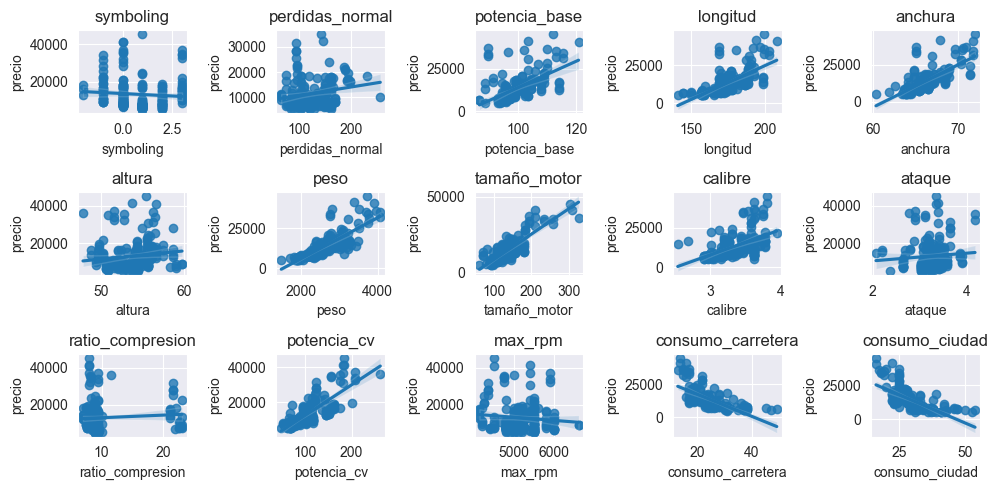

In [91]:
#====== Análisis bivariable
# generar listadp de variables númericas excepto target
cols_numericas = (autos.drop(columns=["precio"]).select_dtypes(include=np.number).columns.tolist())
n_cols_numericas = len(cols_numericas)
import seaborn as sns
import math
fig, ejes = plt.subplots(math.ceil(n_cols_numericas / 5), 5, figsize=(10, 5))
ejes = ejes.flatten()
for i, col in enumerate(cols_numericas):
    sns.regplot(data=autos, x=col, y="precio", ax=ejes[i])
    ejes[i].set_title(col)
plt.tight_layout()
plt.show()

Estudiar la correlación entre variables<br><br>
La correlación lineal entre las variables predictoras que sean numéricas. Visualmente se puede ver en
las graficas como las anteriores pero realizadas entre cada par de predictoras o podemos hacer el
estudio de manera numérica creando una matriz de correlaciones. Vamos a usar esta segunda
aproximación, pero antes:<br><br>
• La variable "tamaño_motor" tiene una relación lineal positiva con el target.<br><br>
• Pero "symboling" no tiene relación lineal y por tanto el valor de la correlación no es válido.<br><br>
Como estamos interesados en la cantidad de correlación y no en si esta es positiva o negativa, lo que
vamos a hacer es generar la matriz de correlaciones y transformarla en sus valores absolutos para
visualizar mejor los posibles casos a contemplar. Primero ponemos la característica target la primer
apara que la primera fila y la primera columna se vean claramente. Debería aparecer lo más oscura
posible. Si es inferior a 0.1 (color claro cercano al blanco) es candidata a eliminarla como predictora.<br><br>
Además, si encontramos correlaciones importantes con otras predictoras es que hay columnas con
colinealidad y eso tampoco es bueno, podemos eliminar la que tenga menor correlación con target.

<Axes: >

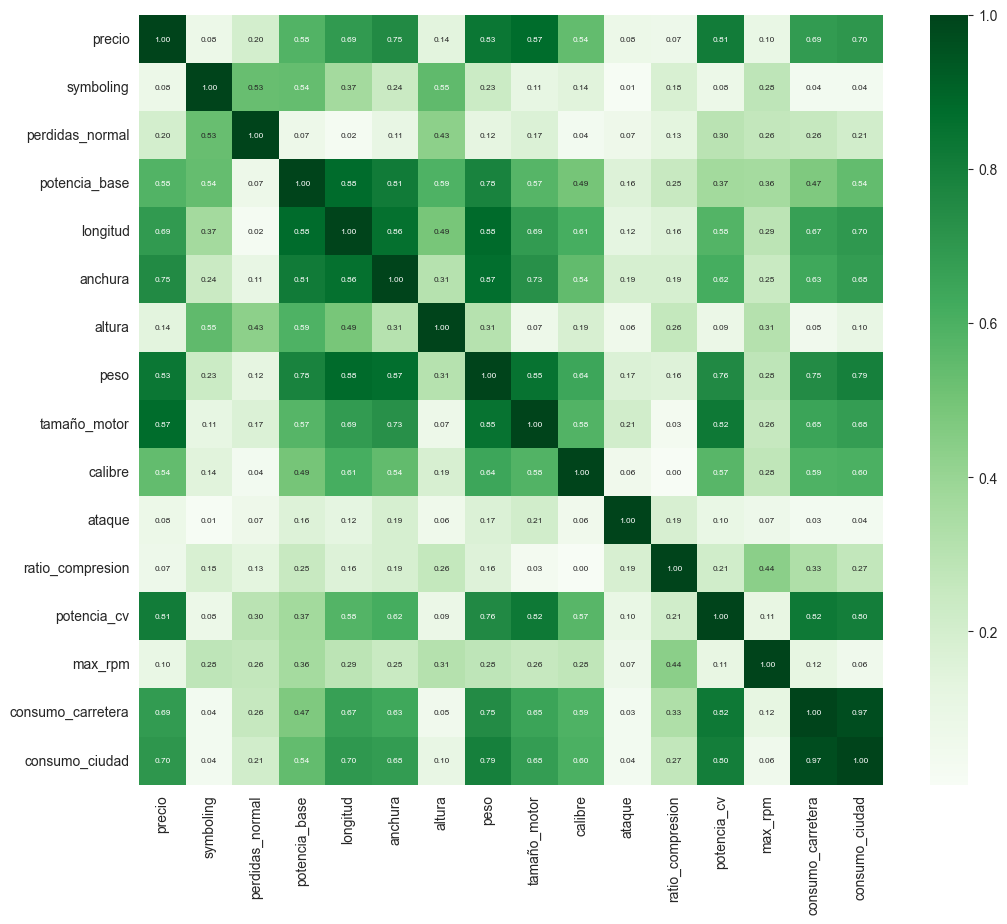

In [92]:
from matplotlib.colors import Colormap as cm
cols = autos.columns.tolist()
cols.insert(0, cols.pop(cols.index('precio')))
autos = autos.reindex(columns=cols)
auto_matriz_correlaciones = autos.corr(numeric_only=True)
fig, ejes = plt.subplots(figsize=(12, 10))
absoluta = auto_matriz_correlaciones.abs()
sns.heatmap(absoluta, annot=True, annot_kws={'size':6}, fmt=".2f", cmap="Greens")

Es el caso de las características longitud, anchura, peso y tamaño del motor. Todas ellas tienen una alta
correlación. Serían candidatas a examinarlas en profundidad para eliminar algunas. <br><br>
A las características que tienen valores categóricos no podemos calcularles el coeficiente de
correlación pero sí podemos hacerles otros test estadísticos como ANOVA (Análisis de la Varianza). Pero
vamos simplemente a dibujar sus boxplot

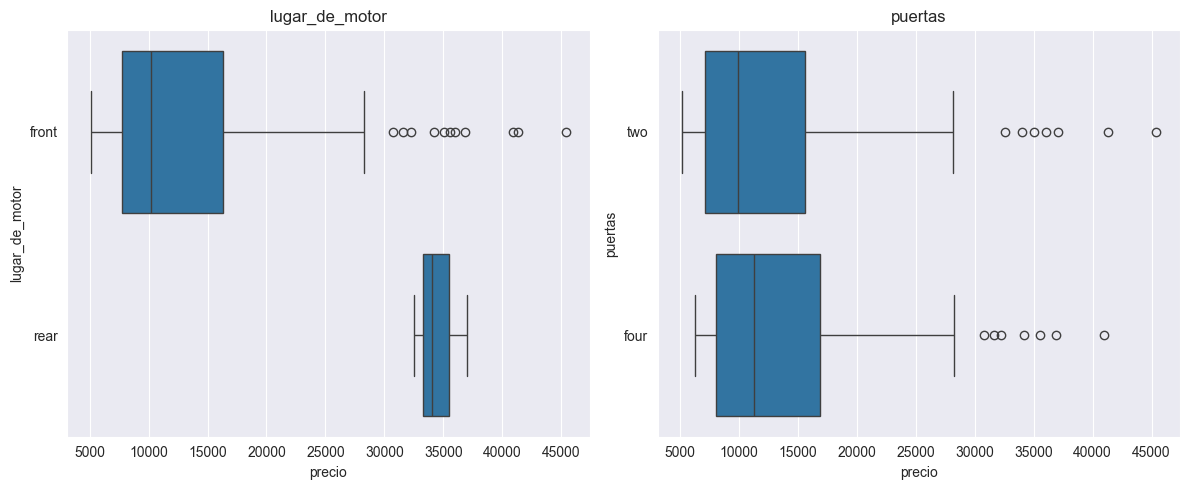

In [93]:
# Definir columnas categóricas
cols_categoricas = ["lugar_de_motor", "puertas"]  # Agrega las que correspondan

n_categoricas = len(cols_categoricas)
filas = math.ceil(n_categoricas / 2)  # Ajustar a 2 columnas para una mejor visualización
fig, ejes = plt.subplots(filas, 2, figsize=(12, 5 * filas))  # Tamaño adaptable
ejes = ejes.flatten()  # Aplanar la matriz de ejes

for i, col in enumerate(cols_categoricas):
    sns.boxplot(data=autos, x="precio", y=col, ax=ejes[i])
    ejes[i].set_title(col)

# Ocultar gráficos vacíos si hay menos subplots de los generados
for j in range(i + 1, len(ejes)):
    fig.delaxes(ejes[j])

plt.tight_layout()
plt.show()

Hay variables categóricas que permiten distinguir entre grupos de valores de la variable objetivo, por
ejemplo la variable "lugar_de_motor" los dos boxplots tienen diferencias significativas para cada valor,
por lo que es una variable que sí aporta información al modelo. <br><br>
La variable "puertas" no permite distinguir claramente grupos de valores del target, por lo que no es
una variable que aporte información al modelo. Visualmente puedes identificar que la distribución de
los boxplots son similares para ambos valores: two ó four.

Aunque se detectan características a eliminar, en este ejemplo, continuamos trabajando con ellas.


FASE DE INGENIERÍA DE CARACTERÍSTICAS<br><br>
Aplicamos una imputación simple sin hacer un análisis mas profundo de los datos. Las variables
numéricas se imputan con la media y las categóricas con la moda. Usamos pipelines de
transformación porque nos dan flexibilidad y nos van a ahorrar mucho trabajo a la larga:<br><br>
• OneHotEncoder para las variables categóricas nominales.<br><br>
• OrdinalEncoder para las variables categóricas ordinales<br><br>

In [94]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

y = autos['precio']
X = autos.drop('precio', axis='columns')

# Distribuir columnas predictoras en categorías
cols_categoricas = ["marca", "combustible", "inyección", "chasis", "tracción", "lugar_de_motor", "tipo_motor", "sistema"]
cols_categoricas_ordinales = ["puertas", "cilindros"]
cols_todas = X.columns.tolist()
cols_numericas = [x for x in cols_todas if x not in cols_categoricas and x not in cols_categoricas_ordinales]

print("Predictoras ordinales: ", cols_categoricas_ordinales)
print("Predictoras categóricas: ", cols_categoricas)
print("Predictoras numéricas: ", cols_numericas)

# Pipelines para preprocesamiento
pipe_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

pipe_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

pipe_categoricas_ordinales = Pipeline(steps=[
    ('ordenc', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)),
    ('imputer', SimpleImputer(strategy="most_frequent"))
])

# Transformador de columnas
preprocesa_columnas = ColumnTransformer(transformers=[
    ('numericas', pipe_numericas, cols_numericas),
    ('categoricas', pipe_categoricas, cols_categoricas),
    ('categoricas_ordinales', pipe_categoricas_ordinales, cols_categoricas_ordinales),
])

Predictoras ordinales:  ['puertas', 'cilindros']
Predictoras categóricas:  ['marca', 'combustible', 'inyección', 'chasis', 'tracción', 'lugar_de_motor', 'tipo_motor', 'sistema']
Predictoras numéricas:  ['symboling', 'perdidas_normal', 'potencia_base', 'longitud', 'anchura', 'altura', 'peso', 'tamaño_motor', 'calibre', 'ataque', 'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad']


DIVIDIR EL DATASET EN TRAIN Y TEST<br><br>
En el exterior, dejamos el 80% de los datos para entrenar y el 20% para test. No tenemos restricciones
de balanceo, etc. Si acaso, vendría bien escalar características numéricas según los algoritmos que
usemos

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Dimensiones de train: ",x_train.shape)
print("Dimensiones de test: ",x_test.shape)

Dimensiones de train:  (160, 25)
Dimensiones de test:  (41, 25)


BUSCAR UN BUEN MODELO DE REGRESIÓN<br><br>
Si se tienen muchos modelos, realizar validación cruzada con todos es costoso, así que se deben ir
descartando los modelos con menos desempeño hasta llegar al modelo final. Una forma de hacerlo:<br><br>
• Inicialmente se dividen los datos en dos partes: Una para realizar la selección del modelo
(datos de selección del modelo) y otra para realizar la prueba de desempeño (datos de test).
Esta parte de los datos se debe usar solo en el final de todo el proceso.<br><br>
• Luego se hace una evaluación de todos los modelos con la división anterior y se seleccionan los
mejores (es preferible usar modelos con principios de funcionamiento diferentes entre ellos).<br><br>
• Con lo mejores modelos (la cantidad depende de los resultados) se realiza la validación
cruzada (detectar si hay overfitting) para obtener los que tengan mejor resultado. Se saca el
mejor o los mejores modelos (mejor desempeño y poca varianza) y se realiza optimización de
hiperparámetros. Este proceso es costoso, por eso se debe realizar con muy pocos modelos.<br><br>
• Luego se selecciona el mejor modelo (mejor desempeño y menor varianza) y se obtienen los
hiperparámetros que dieron el mejor resultado.<br><br>
• Finalmente, se entrena el modelo seleccionado con los hiperparámetros encontrados con los
datos de selección de modelos y se hace la prueba con los datos de test.<br><br>
Creamos una función que se encargue de entrenar a un modelo. Esta función dividirá los datos que le
pasemos de nuevo en train y test. Aunque normalmente le pasaremos un x_train e y_train externo:

In [96]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures  # Generar datos de potencias de los originales
from sklearn.neighbors import KNeighborsRegressor
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

dic_resultados = {}  # diccionario con resultados entrenamiento: (clave:(train_score,test_score),...)

def entrenar_modelo(modelo, procesador, X: pd.DataFrame, y: pd.Series, pct_test: float = 0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=pct_test)

    pipe = Pipeline(steps=[("preprocessor", procesador), ("model", modelo)])  # entrenar
    modelo_entrenado = pipe.fit(x_train, y_train)
    train_score = modelo_entrenado.score(x_train, y_train)

    test_score = modelo_entrenado.score(x_test, y_test)
    return {'train_score': train_score, 'test_score': test_score}

Hacemos otra función para mostrar los resultados del entrenamiento:

In [97]:
def compara_resultado():
    for key in dic_resultados:
        print(f"Regresion: {key}")
        print(f"train_score: {dic_resultados[key]["test_score"]:10.6f}")
        print(f"test score: {dic_resultados[key]["test_score"]:10.6f}")
        print()

Ahora creamos y entrenamos varios modelos de regresión lineal con la función que hemos definido y
registramos los score de cada uno en el diccionario creado a tal fin. Para el caso del modelo de
regresión polinomial, vamos a generar características nuevas así que para automatizar el proceso,
creamos un pipeline que automatice este nuevo paso, de esta manera no tendremos que hacerlo
nosotros manualmente:

In [98]:
dic_resultados['Dummy'] = entrenar_modelo(DummyRegressor(strategy='median'), preprocesa_columnas, x_train, y_train)
#dic_resultados "Regresión lineal' = entrenar_modelo(LinearRegression(), preprocesa_columnas, x_train, y_train)

dic_resultados['Lasso'] = entrenar_modelo(Lasso(alpha=0.1), preprocesa_columnas, x_train, y_train)
dic_resultados['Ridge'] = entrenar_modelo(Ridge(alpha=0.1), preprocesa_columnas, x_train, y_train)

dic_resultados['Elasticnet'] = entrenar_modelo(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True),
                                            preprocesa_columnas, x_train, y_train)

pipe_poli = Pipeline([('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
                     ('linear_regressor', LinearRegression())])

dic_resultados['Polinomial'] = entrenar_modelo(pipe_poli, preprocesa_columnas, x_train, y_train)
dic_resultados['KNN'] = entrenar_modelo(KNeighborsRegressor(n_neighbors=5), preprocesa_columnas, x_train, y_train)

compara_resultado()

Regresion: Dummy
train_score:  -0.155501
test score:  -0.155501

Regresion: Lasso
train_score:   0.884432
test score:   0.884432

Regresion: Ridge
train_score:   0.893741
test score:   0.893741

Regresion: Elasticnet
train_score:   0.878613
test score:   0.878613

Regresion: Polinomial
train_score: -10785085287562257367040.000000
test score: -10785085287562257367040.000000

Regresion: KNN
train_score:   0.729624
test score:   0.729624



Ahora podemos dibujar. Pero antes una aclaración, el modelo etiquetado como “Dummy” es uno que
directamente devuelve siempre un valor fijo independientemente de la entrada, así que solamente acierta si se le
aparece la virgen en un patinete. Como eso es improbable, es muy malo, en regresión similar a uno aleatorio. De
hecho, uno que sea peor que él, tiene mérito. Y sin embargo, uno de los que tenemos tiene tanto overfitting que
es mucho peor, porque al menos el dummy da la mediana y no se aleja mucho en sus predicciones, tendrá un
score negativo (coeficiente de determinación malo) pero no muy alto. Así que cuando ejecutes el código, el
modelo que de un score horrible es candidato a descartarlo (aunque si antes hubiésemos realizado limpieza de
predictoras, selección de características formalmente hablando, el resultado podría cambiar).

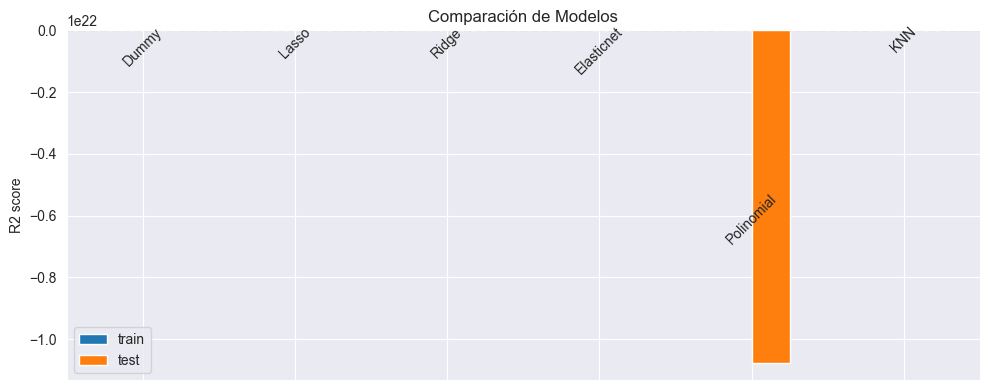

In [99]:
# Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = dic_resultados.keys()

# Crear diccionarios vacíos para almacenar los resultados de entrenamiento y prueba
res_train = {}
res_test = {}

# Iterar sobre los nombres de los modelos
for nombre in nombre_modelos:
    # Almacenar el puntaje de entrenamiento del modelo actual en el diccionario res_train
    res_train[nombre] = dic_resultados[nombre]['train_score']
    # Almacenar el puntaje de prueba del modelo actual en el diccionario res_test
    res_test[nombre] = dic_resultados[nombre]['test_score']

# Crear un DataFrame de pandas para comparar los resultados de entrenamiento y prueba
df_comparacion = pd.DataFrame([res_train, res_test], index=['train', 'test'])

# Dibujar un gráfico de barras para comparar los resultados
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind="bar", ax=ax)

# Personalizar el gráfico
ax.set_ylabel('R2 score')
ax.set_title('Comparación de Modelos')
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])  # Ocultar las etiquetas del eje x

# Añadir etiquetas de texto dentro de las barras
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] + df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center', va='center_baseline', rotation=45)

# Dibujar una línea horizontal para el resultado del DummyRegressor
ax.axhline(df_comparacion['Dummy']['test'], color='red', linestyle='--', alpha=0.8)

# Ajustar el diseño del gráfico para evitar que las etiquetas se superpongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Vuelve a ejecutar el código, y si vuelve a aparecer uno que destaque por lo malo que es, lo volvemos a nominar y
comentamos su código.


Al final el gráfico que te quedará parecido al de arriba, verás que son todos bastante competentes (salvo el
dummy, claro y alguno que tenga overfitting). He tachado los nombres para que tengas que averiguar tu mismo
cuales tienen problemas si mantenemos todas las predictoras. Nos hemos quedado con 4 que parecen mejores.

VALIDACIÓN CRUZADA<br><br>
Analizar la varianza de los modelos más prometedores para obtener los que tengan mejor desempeño.
Aunque tu debes usar los 4 que hayas considerado mejores, yo te voy a mostrar el código de todos:


In [100]:
# =============================================================================
# Validación cruzada
# =============================================================================

# Lista para almacenar cada uno de los modelos seleccionados para CV
modelos = []

# Almacenando los modelos como una tupla (nombre, modelo)
modelos.append(('Regresión Lineal', LinearRegression()))
modelos.append(('Lasso', Lasso(alpha=0.1)))
modelos.append(('Ridge', Ridge(alpha=0.1)))
modelos.append(('Elastic net', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True)))
modelos.append(('Polinomial', pipe_poli))  # Asumiendo que 'pipe_poli' está definido previamente
modelos.append(('KNN', KNeighborsRegressor(n_neighbors=5)))

Ahora vamos a definir estructuras que nos permitan realizar la CV con 10-Fold para cada modelo. Yo
voy a usar todos y eso hará que mis gráficos no sean muy buenos al tener dos modelos muy malos.

10-Fold CV de Regresión Lineal, media: -3.1068462919046964e+23, desviación: 7.447909514335942e+23
10-Fold CV de Lasso, media: 0.8118964685618455, desviación: 0.18780739972029722
10-Fold CV de Ridge, media: 0.8598830851583965, desviación: 0.08569724743157929
10-Fold CV de Elastic net, media: 0.8443053198950057, desviación: 0.11918862989637234
10-Fold CV de Polinomial, media: -3.071092874298218e+22, desviación: 4.250576921020747e+22
10-Fold CV de KNN, media: 0.7809672256194312, desviación: 0.12045324232384792


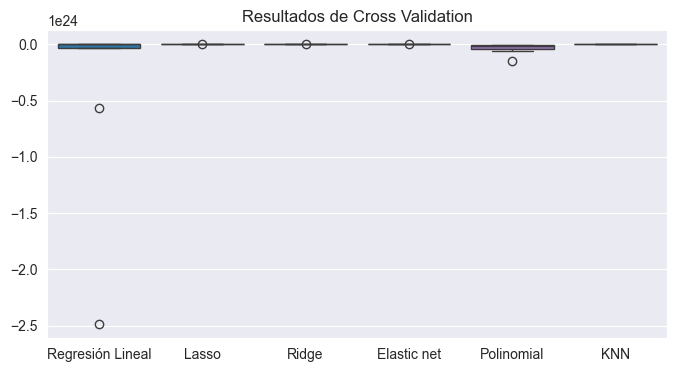

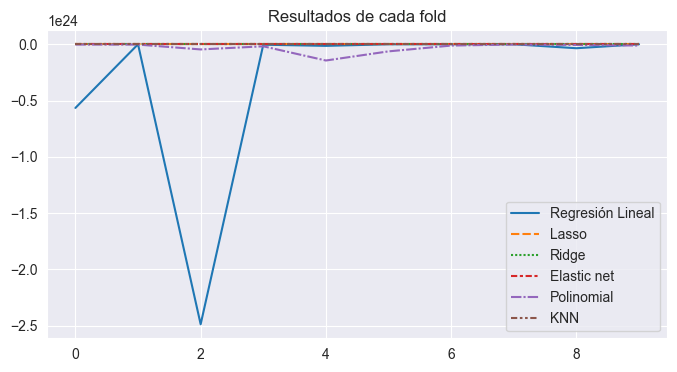

In [101]:
# =============================================================================
# Validación cruzada
# =============================================================================

# Lista para almacenar cada uno de los modelos seleccionados para CV
modelos = []

# Almacenando los modelos como una tupla (nombre, modelo)
modelos.append(('Regresión Lineal', LinearRegression()))
modelos.append(('Lasso', Lasso(alpha=0.1)))
modelos.append(('Ridge', Ridge(alpha=0.1)))
modelos.append(('Elastic net', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True)))
modelos.append(('Polinomial', pipe_poli))  # Asumiendo que 'pipe_poli' está definido previamente
modelos.append(('KNN', KNeighborsRegressor(n_neighbors=5)))


# Grabar los resultados de cada modelo
from sklearn import model_selection
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Semilla para obtener los mismos resultados de pruebas
seed = 123

resultados = []
nombres = []

for n, m in modelos:
    modelo_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", m)])
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)  # Añadida semilla y shuffle

    # kfold cross validation
    cv_resultados = model_selection.cross_val_score(estimator=modelo_pipe, X=x_train, y=y_train, cv=kfold, scoring="r2")

    resultados.append(cv_resultados)
    nombres.append(n)

    msg = f"{10}-Fold CV de {n}, media: {cv_resultados.mean()}, desviación: {cv_resultados.std()}"
    print(msg)

plt.figure(figsize=(8, 4))
result_df = pd.DataFrame(resultados, index=nombres).T
sns.boxplot(data=result_df)
plt.title("Resultados de Cross Validation")
plt.show()

plt.figure(figsize=(8, 4))
sns.lineplot(data=result_df)
plt.title("Resultados de cada fold")
plt.show()

Comparación Estadística de Modelos<br><br>
Ahora tras la validación cruzada vamos a usar los resultados para comprobar si hay o no una
diferencia significativa entre los modelos considerados. Usaremos un test ANOVA de un factor

In [102]:
# Comparación estadística de los modelos
from scipy.stats import f_oneway

# Obtener los resultados de cada modelo
model1 = result_df['Regresión Lineal']
model2 = result_df['Lasso']
model3 = result_df['Ridge']
model4 = result_df['Elastic net']
model5 = result_df['Polinomial']
model6 = result_df['KNN']

# Realizar un ANOVA de un factor para comparar los modelos
estadistico, p_valor = f_oneway(model1, model2, model3, model4, model5, model6)

print(f"Estadístico: {estadistico}")
print(f"p_valor: {p_valor}")

# Establecer el nivel de significancia
alfa = 0.05

# Realizar la prueba de hipótesis
if p_valor < alfa:
    print("Existe una diferencia estadísticamente significativa en los resultados de cross-validation de los modelos.")
else:
    print("No existe una diferencia estadísticamente significativa en los resultados de cross-validation de los modelos.")

Estadístico: 1.514524822092854
p_valor: 0.20068821244661694
No existe una diferencia estadísticamente significativa en los resultados de cross-validation de los modelos.


En mi caso el test no es adecuado porque una de las condiciones que asume es que las desviaciones de
todos los datos que participan en el el test son similares (homoscedasticidad) y en mi ejecución no se
cumple al mantener los dos modelos que son rematadamente malos con una varianza excesiva
respecto a los demás.

TUNING DE HIPERPARÁMETROS<br><br>
Una vez tenemos dos modelos de muy diferente funcionamiento les ajustamos los hiperparámetros.
Para automatizar el proceso utilizo Grid search. En mi caso voy a hacerlos con Ridge y KNN para que
veáis como hacerlo. En el diccionario de parámetros podéis incluir una entrada para cada
hiperparámetro diferente que tenga el algoritmo de aprendizaje y una lista de valores que queréis
probar. Lógicamente grid search probará las combinaciones de todos y eso lleva tiempo.

In [103]:
from sklearn.model_selection import GridSearchCV

# Para Lasso
print("==== Tuning de Parámetros\n Para Lasso ----")

lasso_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", Lasso())])
parametros = {'model__alpha': [0.01, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0]}

gs = GridSearchCV(estimator=lasso_pipe, param_grid=parametros, cv=5, return_train_score=True, scoring='r2')
gs.fit(x_train, y_train)

print(f"Mejor resultado = {gs.best_score_}")
print(f"Mejor std = {gs.cv_results_['std_test_score'][gs.best_index_]}")
print(f"Mejores parámetros = {gs.best_params_}")

# Para KNN
print("==== Para KNN ----")

knn_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", KNeighborsRegressor())])
parametros = {'model__n_neighbors': [5, 10, 12, 14, 18, 20, 25, 30, 35, 50]}
gs1 = GridSearchCV(knn_pipe, parametros, cv=5, return_train_score=True, scoring='r2')

gs1.fit(x_train, y_train)
print(f"Mejor resultado = {gs1.best_score_}")
print(f"Mejor std = {gs1.cv_results_['std_test_score'][gs1.best_index_]}")
print(f"Mejores parámetros = {gs1.best_params_}")

==== Tuning de Parámetros
 Para Lasso ----
Mejor resultado = 0.8727305592747531
Mejor std = 0.04140099522025022
Mejores parámetros = {'model__alpha': 1.0}
==== Para KNN ----
Mejor resultado = 0.8072585381933148
Mejor std = 0.06129759146476002
Mejores parámetros = {'model__n_neighbors': 5}


ENTRENAR EL MEJOR MODELO CON LOS MEJORES HIPERPARÁMETROS<br><br>
Una vez tengamos los mejores scores de nuestros mejores modelos, podemos comparar con qué
hiperparámetros de uno de ellos conseguimos el mejor puntuación. A igualdad de scores o valores
similares nos quedaremos con el que sea más eficiente, escalable, etc. Pero si hay diferencias nos
quedaremos con el mejor y sabiendo la mejor de sus configuraciones. Ahora solamente nos queda
entrenarlo con todos los datos:


In [104]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from joblib import dump, load
from sklearn import metrics

# Listar las columnas categóricas y numéricas
columnas_categoricas = ['marca', 'combustible']
columnas_numericas = [col for col in x_train.columns if col not in columnas_categoricas]

# Verificar las primeras filas de las columnas numéricas para asegurarse de que no haya valores no numéricos
print(x_train[columnas_numericas].head())

# Convertir las columnas numéricas a valores numéricos, forzando a que cualquier texto se convierta en NaN
x_train[columnas_numericas] = x_train[columnas_numericas].apply(pd.to_numeric, errors='coerce')
x_test[columnas_numericas] = x_test[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Imputar los valores faltantes en las columnas numéricas con la media
# Crear los transformadores
preprocesa_columnas = ColumnTransformer(
    transformers=[
        # Preprocesamiento de columnas categóricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas),  # Ignorar categorías desconocidas
        # Preprocesamiento de columnas numéricas (imputar los valores faltantes)
        ('num', SimpleImputer(strategy='mean'), columnas_numericas)
    ],
    remainder='passthrough'  # Deja las otras columnas sin cambios
)

# Crear el pipeline con el preprocesador y el modelo KNN
pipeline = Pipeline(steps=[
    ('preprocessor', preprocesa_columnas),  # Preprocesamiento de columnas
    ('model', KNeighborsRegressor(n_neighbors=gs1.best_params_['model__n_neighbors']))  # Modelo KNN
])

# Entrenar el modelo con los datos de entrenamiento
pipeline.fit(x_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = pipeline.predict(x_test)

# Evaluar el rendimiento utilizando el coeficiente de determinación R^2
print("R2:", metrics.r2_score(y_true=y_test, y_pred=y_pred))

# Guardar el modelo entrenado en un archivo utilizando joblib
dump(pipeline, 'modelo_ganador.joblib')

# Cargar el modelo guardado desde el archivo
modelo = load('modelo_ganador.joblib')

# Seleccionar algunos datos de prueba para hacer una predicción
datos_prueba = x_test[:1]

# Realizar una predicción utilizando el modelo cargado
print(f"Predicción: {modelo.predict(datos_prueba)}")  # Resultados de predicción con el modelo cargado


     symboling  perdidas_normal inyección puertas     chasis tracción  \
122          3            186.0       std     two  hatchback      rwd   
157          0             91.0       std    four  hatchback      fwd   
33           1            101.0       std     two  hatchback      fwd   
23           1            148.0       std    four  hatchback      fwd   
172         -1             65.0       std    four      sedan      fwd   

    lugar_de_motor  potencia_base  longitud  anchura  ...  cilindros  \
122          front           94.5     168.9     68.3  ...       four   
157          front           95.7     166.3     64.4  ...       four   
33           front           93.7     150.0     64.0  ...       four   
23           front           93.7     157.3     63.8  ...       four   
172          front          102.4     175.6     66.5  ...       four   

     tamaño_motor sistema calibre  ataque ratio_compresion  potencia_cv  \
122           151    mpfi    3.94    3.11            

Y validarlo con los datos de test, además de mostrar gráficamente como son los errores que comete e
incluso hacerle alguna medida de importancia de características para poder descartar más características predictoras sin que afecte mucho a su desempeño. En esta ocasión voy a utilizar un test
de permutaciones para situar la importancia de cada característica en un gráfico. Ten en cuenta que la
importancia de cada característica depende del modelo, es decir, en dos modelos distintos aunque
usen los mismos datos, la importancia puede cambiar


R2: 0.6820488865714726


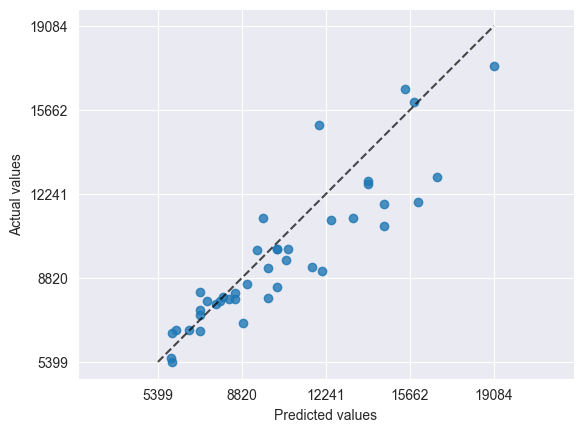

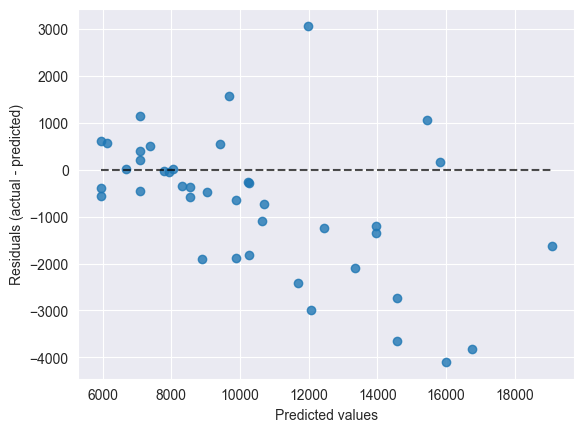

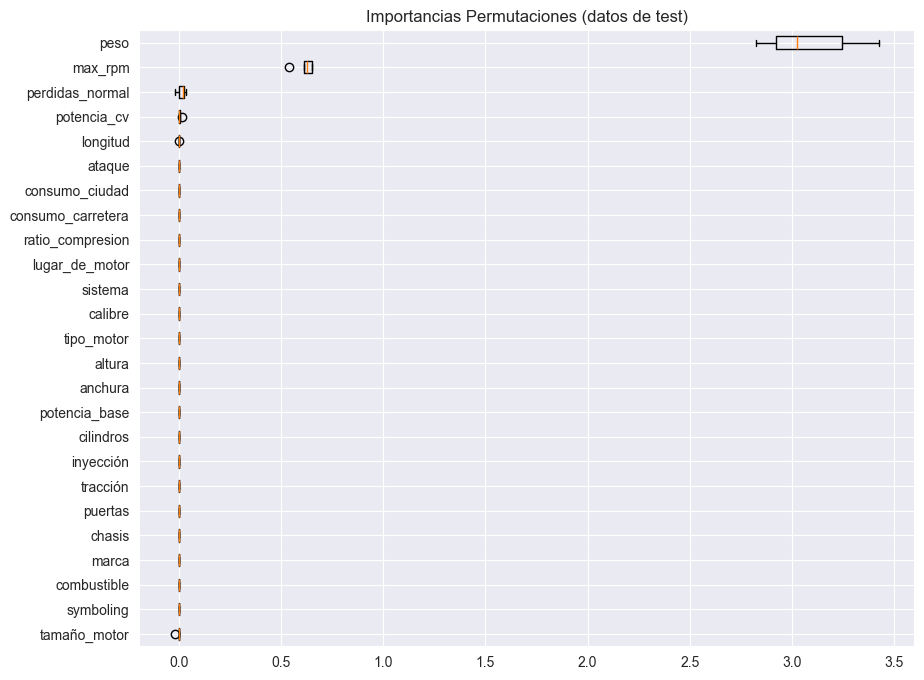

In [105]:
# =============================================================================
# Entrenar, medir y guardar el modelo ganador
# =============================================================================

# Suponiendo que el modelo ganador haya sido el KNN
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Crear el pipeline de preprocesamiento y modelo KNN con los mejores parámetros
knn_pipe = Pipeline(steps=[("preprocessor", preprocesa_columnas), ("model", KNeighborsRegressor(n_neighbors=gs1.best_params_['model__n_neighbors']))])

# Entrenar el modelo KNN con los datos de entrenamiento
knn_pipe.fit(x_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = knn_pipe.predict(x_test)

# Evaluar el rendimiento del modelo utilizando el coeficiente de determinación R^2
print("R2:", metrics.r2_score(y_true=y_test, y_pred=y_pred))

# Mostrar un gráfico de errores de predicción
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")
plt.show()

# Mostrar un gráfico de residuos
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="residual_vs_predicted")
plt.show()

# Calcular la importancia de las características utilizando permutaciones
imps = permutation_importance(knn_pipe, x_test, y_test, n_repeats=5, scoring="r2", n_jobs=-1, random_state=123)

# Ordenar las importancias de las características de forma descendente
perm_sorted_idx = imps.importances_mean.argsort()

# Crear un gráfico de cajas para mostrar la distribución de las importancias de las características
fig = plt.figure(figsize=(10, 8))
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False, labels=x_test.columns[perm_sorted_idx])
plt.title("Importancias Permutaciones (datos de test)")
plt.show()

Y una vez entrenado como necesitemos, lo guardaríamos para usarlo en alguna aplicación:


In [106]:
from joblib import dump                               #libreria de serializacion
dump(knn_pipe, 'modelo_ganador.joblib')

#... para usarlo más tarde en alguna aplicación.
from joblib import load

modelo = load('modelo_ganador.joblib')
datos_prueba = x_test[:1]
print(f"Predicción: {modelo.predict(datos_prueba)}")                              # resultados de prediccion con el modelo

Predicción: [6119.6]


APLICAR LO ANTERIOR<br><br>
Haz una copia al fichero y lo renombras añadiéndole el sufijo “_v2.py” o "_v2.ipybn. Debes
modificarlo ejecutando el original de manera que


ENTREGA 4: Entrega los ficheros u02_p03_a2_alumno.* y u02_p03_a2_alumno_v2 de manera que
el de la segunda versión:<br><br>
a) Cuando se genere el primer gráfico, busca una de las características que no tengan una
relación lineal con el target. La eliminas del DataFrame y de los arrays de nombres de columnas
en el fichero _v2. Indica qué característica eliminas:______
<br><br>
b) Cuando aparezca la matriz de correlaciones, identifica las características que tengan menos
del 0.2% de correlación lineal con el target y las eliminas del DataFrame en el nuevo fichero.
¿Cuáles son las variables que eliminas?______
<br><br>
c) Además, para eliminar colinealidad localiza todas las parejas (puedes ir bajando desde la
primera a la última fila y buscar y eliminar correlaciones mayores de 0.8 que no sea con el
target). ¿Qué columnas has eliminado?______
<br><br>
d) En los diagramas boxplot de las columnas categóricas, elimina una o dos que no genere
diferencias importantes entre sus valores (las identificas porque los boxplot de cada valor serán
parecidos). ¿Cuáles eliminas?______
<br><br>
e) En el paso de "Buscar un buen modelo de regresión" descarta los 3 peores (aquellos que tengan
peor R2
 en los datos de test). Muestra captura de scores y el gráfico e indica los modelos que
descartas.______ .
<br><br>
f) En la validación cruzada, utiliza solamente los 3 mejores modelos del paso anterior. Muestra
captura de resultados y escoge aquel que tenga menor varianza (es más estable).______<br><br>

g) En el tunning de hiperparámetros, busca los parámetros que se puedan usar con el modelo
con el que te has quedado (si das uno erróneo al grid search, el mensaje de error te dice los que
puedes usar). Indica captura de ejecución de esta fase y del entrenamiento del modelo elegido
con los datos de train y test.______<br><br>

h) Por último, analiza los errores que comete con el test mediante gráficos de predicciones vs
valores reales, gráfico de residuos, y gráfico de test de permutaciones para estudiar la
importancia de las predictoras en el modelo. Guarda el modelo en un fichero.______
